In [1]:
import sys, os
!pip install /users/sughosh/gsv_interface
!export FDB5_CONFIG_FILE=/scratch/project_465000454/sughosh/config.yaml
os.environ["FDB5_CONFIG_FILE"] = "/scratch/project_465000454/sughosh/config.yaml"
import xarray as xr
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Processing /users/sughosh/gsv_interface
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gsv: filename=gsv-0.4.4.dev12-py3-none-any.whl size=40635 sha256=054d2cec274ca9b98e28830db25a37f0a865a0dd5120fc93fd9c7cc285ed1f63
  Stored in directory: /tmp/pip-ephem-wheel-cache-aq_pqag7/wheels/f3/31/03/bcd4fa862674688b274f36bf0d5b9a23a8b4183127bd0288dd
Successfully built gsv
  Attempting uninstall: gsv
    Found existing installation: gsv 0.4.4.dev12
    Uninstalling gsv-0.4.4.dev12:
      Successfully uninstalled gsv-0.4.4.dev12


In [13]:
!fdb-list expver=a08r,class=rd,stream=monr,date=19900101,time=0000,domain=g,type=fc,levtype=o2d

Listing for request
retrieve,
	expver=a08r,
	class=rd,
	stream=monr,
	date=19900101,
	time=0000,
	domain=g,
	type=fc,
	levtype=o2d


{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263122},length=146260
{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263121},length=146260
{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263100},length=146260
{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263001},length=146260
{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263101},length=146260


In [57]:

request= {
    "class": "rd",
    "expver": "a08r",
    "type": "fc",
    "domain": "g",
    "date": "19900101",
    "time": "0000",

    "step": "0/to/500000",
    "stream": "monr",
    "levtype": "sfc",
    "param": ['151','167','260048'], #atms

    # "step": "0/to/500000",
    # "stream": "monr",
    # "levtype": "pl",
    # "levelist" : [1, 100, 500, 925], #[1,5,10,20,30,50,70,100,150,200250,300,400,500,600,700,850,925],
    # "param": ['130','131','132','133'], #pl

    # "step": "0/to/500000",
    # "stream": "monr",
    # "levtype": "o2d",
    # "param": ['263001','263100','263101'] #ocean
}
from gsv.retriever import GSVRetriever
gsv = GSVRetriever()
ds = gsv.request_data(request)
ds

Correctly decoded avg_siconc on level 0      at 1990-02-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-02-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-02-01T00:00:00


<xarray.Dataset>
Dimensions:     (ncells: 120184, cell_corners: 4, time: 1, height: 1)
Coordinates:
    lon         (ncells) float64 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
    lat         (ncells) float64 -84.21 -84.21 -84.21 ... 50.23 50.01 50.01
    lon_bounds  (ncells, cell_corners) float64 72.0 73.0 73.0 ... 72.95 73.0
    lat_bounds  (ncells, cell_corners) float64 -84.26 -84.26 ... 50.11 49.98
  * time        (time) datetime64[ns] 1990-02-01
  * height      (height) int64 0
Dimensions without coordinates: ncells, cell_corners
Data variables:
    avg_siconc  (time, height, ncells) float64 nan nan nan nan ... nan nan nan
    avg_sos     (time, height, ncells) float64 nan nan nan nan ... nan nan nan
    avg_tos     (time, height, ncells) float64 nan nan nan nan ... nan nan nan

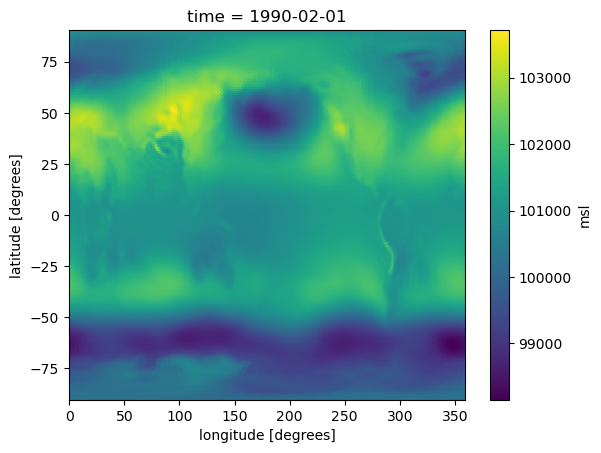

In [56]:
ds.msl[0].plot()

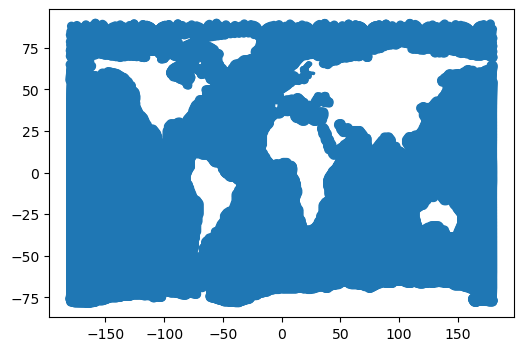

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(ds.lon, ds.lat, ds.avg_sos)

In [47]:
def monthly_range(start_date, end_date):
    current_date = start_date
    while current_date <= end_date:
        yield current_date
        year = current_date.year + current_date.month // 12
        month = (current_date.month % 12) + 1
        current_date = datetime(year, month, 1)

ocean_data = [] 

from datetime import datetime, timedelta

start_date = datetime(1990, 1, 1)
end_date = datetime(2020, 1, 1)

request_oc= request.copy()

for dt in monthly_range(start_date, end_date):
    formatted_date = dt.strftime("%Y%m%d")
    request_oc["date"] = formatted_date
    ds = gsv.request_data(request_oc)
    ocean_data.append(ds)


Correctly decoded avg_siconc on level 0      at 1990-02-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-02-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-02-01T00:00:00
Correctly decoded avg_siconc on level 0      at 1990-03-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-03-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-03-01T00:00:00
Correctly decoded avg_siconc on level 0      at 1990-04-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-04-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-04-01T00:00:00
Correctly decoded avg_siconc on level 0      at 1990-05-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-05-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-05-01T00:00:00
Correctly decoded avg_siconc on level 0      at 1990-06-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-06-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-06-01T00:00:00
Correctly 

type: 

In [48]:
ocean_data = xr.concat(ocean_data, dim='time')

In [9]:
ds.to_netcdf("/scratch/project_465000454/sughosh/replicability_data/atm_2d.nc")
# ds.to_netcdf("/scratch/project_465000454/sughosh/replicability_data/atm_3d.nc")
# ds.to_netcdf("/scratch/project_465000454/sughosh/replicability_data/atm_2d.nc")
